# Info

This is data simulation script. It may take few hours to run. It is not necessary to run this script. You can skip this script and use the provided data.

It is provided for those who want to generate the data from scratch.

In [3]:
# library(devtools)
# install_github("mwgrassgreen/RobNorm")

In [4]:
library(limma)
library(reshape2)
library(gridExtra)

source("../../evaluation_utils/plots_eda.R")
source("../../evaluation_utils/simulation_func.R")


# Settings

Parameters set to generate simulated data with 600 samples and 6000 proteins.

In [5]:
generate_metadata <- function(batch_info, mode){

    if (mode == "balanced"){
        # Create batch assignments for each group
        batches <- rep(c("batch1", "batch2", "batch3"), each = 100)
        # Combine batch assignments
        batch_info$condition <- as.factor(c(rep("A", 300), rep("B", 300)))
        batch_info$batch <- as.factor(c(batches[sample(1:300)], batches[sample(1:300)]))

    } else if (mode == "strong_imbalanced") {
        # Strong imbalance
        # Create batch assignments for each group    
        batches_A <- c(rep("batch1", 32), rep("batch2", 28), rep("batch3", 288))
        batches_B <- c(rep("batch1", 8), rep("batch2", 52), rep("batch3", 192))
        # Combine batch assignments
        batch_info$condition <- as.factor(c(rep("A", length(batches_A)), rep("B", length(batches_B))))
        batch_info$batch <- as.factor(c(
            batches_A[sample(1:length(batches_A))], 
            batches_B[sample(1:length(batches_B))]))
    
    } else if(mode == "mild_imbalanced") {
        # Mild imbalance
        # Create batch assignments for each group    
        batches_A <- c(rep("batch1", 36), rep("batch2", 91), rep("batch3", 185))
        batches_B <- c(rep("batch1", 54), rep("batch2", 49), rep("batch3", 185))
        # Combine batch assignments
        batch_info$condition <- as.factor(c(rep("A", length(batches_A)), rep("B", length(batches_B))))
        batch_info$batch <- as.factor(c(
            batches_A[sample(1:length(batches_A))], 
            batches_B[sample(1:length(batches_B))]))
    }
    return(batch_info)

}

In [6]:
getwd()

[1] "/home/yuliya-cosybio/repos/cosybio/fedRBE/evaluation_data/simulated"

In [7]:
workdir <- "./"

number_of_runs = 30

mu_1 = 1.45
mu_4 = 1.25

frac_1 = 0.45
frac_7 = 0.15

# number of samples
m = 600

## generate data

In [8]:
check_dirs <- function(workdir){
    if (!dir.exists(workdir)){
        dir.create(workdir)
    }
}

[1] "./balanced/before/intermediate"
[1] "Run simulation for mode: balanced"
[1] "Run number 1"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
1.2503082 1.5031058 0.5726186 
   batch1    batch2    batch3 
0.8033499 0.4537007 0.5984987 
[1] "./balanced/before/intermediate/1_intensities_data.tsv"
[1] "Run number 2"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.68902143 2.66871485 0.02433083 
   batch1    batch2    batch3 
0.1474629 0.7002893 1.2864362 
[1] "./balanced/before/intermediate/2_intensities_data.tsv"
[1] "Run number 3"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.49056661 1.72214137 0.05975055 
     batch1      batch2      batch3 
 1.09385581  0.09829092 21.80750439 
[1] "./balanced/before/intermediate/3_intensities_data.tsv"
[1] "Run number 4"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


[1] "Run number 11"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.90954760 0.04708064 1.93835789 
   batch1    batch2    batch3 
0.4780542 0.3259080 0.8234358 
[1] "./balanced/before/intermediate/11_intensities_data.tsv"
[1] "Run number 12"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.1728150 0.5425611 1.0673649 
   batch1    batch2    batch3 
1.2113395 0.5235229 0.2058097 
[1] "./balanced/before/intermediate/12_intensities_data.tsv"
[1] "Run number 13"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.65058474 0.03319754 2.52386070 
   batch1    batch2    batch3 
0.4317096 0.3157998 2.1622060 
[1] "./balanced/before/intermediate/13_intensities_data.tsv"
[1] "Run number 14"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.39623694 0.22914944 0.04127497 
   batch1    

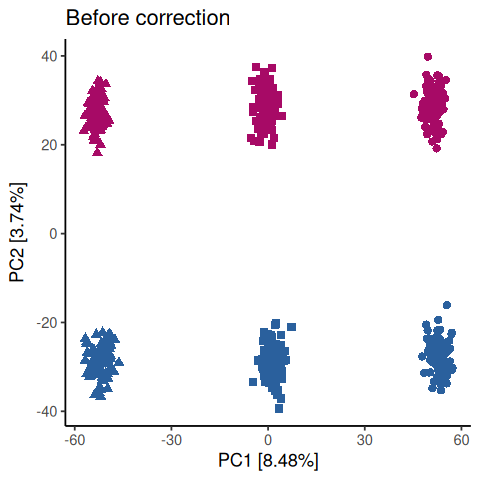

[1] "Run number 21"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.83658560 0.06407651 3.51293801 
   batch1    batch2    batch3 
0.1591542 4.4731620 0.5409860 
[1] "./balanced/before/intermediate/21_intensities_data.tsv"
[1] "Run number 22"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.2795791 1.4956285 0.8899761 
    batch1     batch2     batch3 
 0.1523778 10.1882854  0.4831944 
[1] "./balanced/before/intermediate/22_intensities_data.tsv"
[1] "Run number 23"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.2238031 0.7429476 2.1617570 
   batch1    batch2    batch3 
1.0116561 0.2121129 0.3467401 
[1] "./balanced/before/intermediate/23_intensities_data.tsv"
[1] "Run number 24"
180 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
5.13803763 0.15964090 0.01040965 
   batch1    

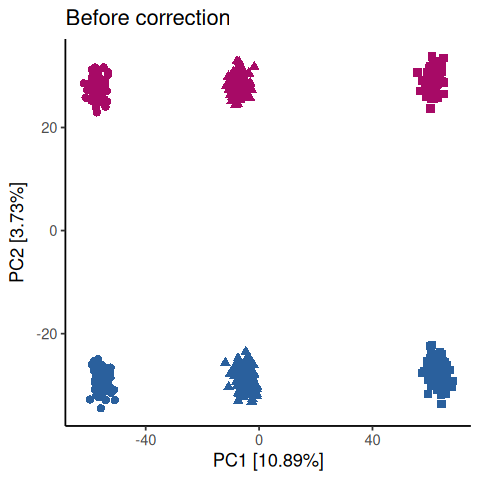

[1] "./mild_imbalanced/before/intermediate"
[1] "Run simulation for mode: mild_imbalanced"
[1] "Run number 1"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
1.4523240 1.1656980 0.8779025 
     batch1      batch2      batch3 
  0.1846141 567.7414314   0.2840939 
[1] "./mild_imbalanced/before/intermediate/1_intensities_data.tsv"
[1] "Run number 2"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.8324523 1.2844260 1.8917908 
   batch1    batch2    batch3 
1.2933713 2.0626440 0.4888013 
[1] "./mild_imbalanced/before/intermediate/2_intensities_data.tsv"
[1] "Run number 3"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
1.12716783 0.09601452 3.83169695 
   batch1    batch2    batch3 
0.2277839 0.3156311 3.9399006 
[1] "./mild_imbalanced/before/intermediate/3_intensities_data.tsv"
[1] "Run number 4"
168 
[1] "Number of DE proteins: 2400\

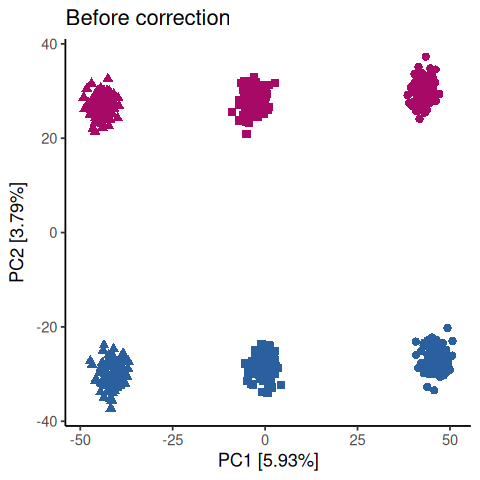

[1] "Run number 11"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.3845698 0.5488828 1.5210319 
    batch1     batch2     batch3 
0.06624144 0.51850238 0.90040296 
[1] "./mild_imbalanced/before/intermediate/11_intensities_data.tsv"
[1] "Run number 12"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.7680631 0.2738088 0.1702689 
   batch1    batch2    batch3 
0.0822012 4.8739228 0.4215392 
[1] "./mild_imbalanced/before/intermediate/12_intensities_data.tsv"
[1] "Run number 13"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.1139387 1.3068996 1.5979051 
   batch1    batch2    batch3 
0.3811361 0.1456030 5.4755334 
[1] "./mild_imbalanced/before/intermediate/13_intensities_data.tsv"
[1] "Run number 14"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
3.0412584 0.1498529 0.9312535 
   b

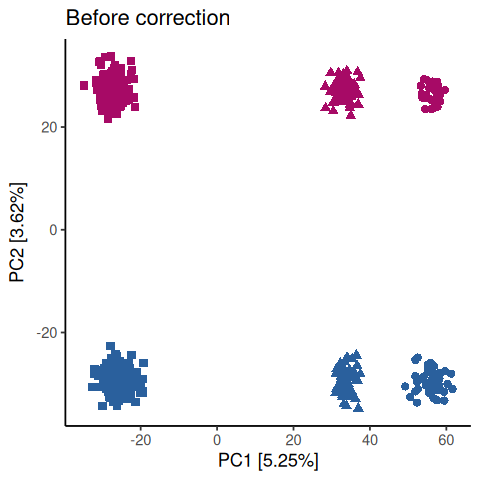

[1] "Run number 21"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.73981440 0.06156335 1.52850153 
    batch1     batch2     batch3 
0.09081261 0.90551718 0.34709439 
[1] "./mild_imbalanced/before/intermediate/21_intensities_data.tsv"
[1] "Run number 22"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.02113682 1.77609086 0.51723183 
    batch1     batch2     batch3 
0.07774468 1.84248993 0.44235621 
[1] "./mild_imbalanced/before/intermediate/22_intensities_data.tsv"
[1] "Run number 23"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.66322552 0.16110233 0.05714622 
   batch1    batch2    batch3 
0.3848058 0.2286202 0.5434729 
[1] "./mild_imbalanced/before/intermediate/23_intensities_data.tsv"
[1] "Run number 24"
168 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.200891

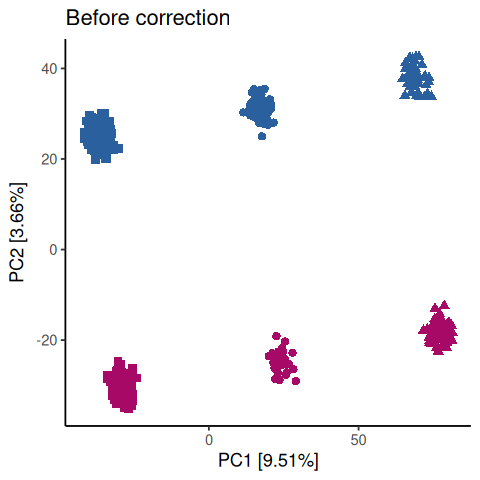

[1] "./strong_imbalanced/before/intermediate"
[1] "Run simulation for mode: strong_imbalanced"
[1] "Run number 1"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.27545688 0.85456378 0.09190045 
    batch1     batch2     batch3 
22.1601055  0.2745678  0.1299232 
[1] "./strong_imbalanced/before/intermediate/1_intensities_data.tsv"
[1] "Run number 2"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
1.15200509 0.09402413 0.69904025 
   batch1    batch2    batch3 
0.1172954 0.2990687 0.5738676 
[1] "./strong_imbalanced/before/intermediate/2_intensities_data.tsv"
[1] "Run number 3"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.28583974 0.53393618 0.08611646 
   batch1    batch2    batch3 
0.2479048 0.1762037 4.3711851 
[1] "./strong_imbalanced/before/intermediate/3_intensities_data.tsv"
[1] "Run number 4"
162 
[1] "Number of DE

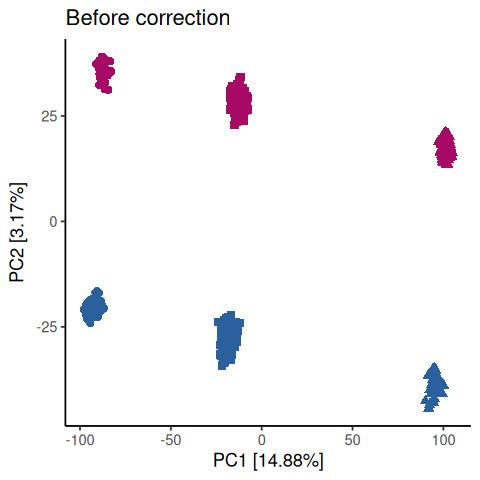

[1] "Run number 11"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.1255662 0.4915842 0.7458103 
   batch1    batch2    batch3 
0.9464812 0.2893656 0.2032374 
[1] "./strong_imbalanced/before/intermediate/11_intensities_data.tsv"
[1] "Run number 12"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.43716642 0.12297201 0.09266323 
   batch1    batch2    batch3 
0.5865118 1.4295723 0.1996443 
[1] "./strong_imbalanced/before/intermediate/12_intensities_data.tsv"
[1] "Run number 13"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
1.2270684 0.7618701 0.5063105 
   batch1    batch2    batch3 
0.2262783 0.7210434 1.0216234 
[1] "./strong_imbalanced/before/intermediate/13_intensities_data.tsv"
[1] "Run number 14"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.5523378 1.6233838 0.1520470

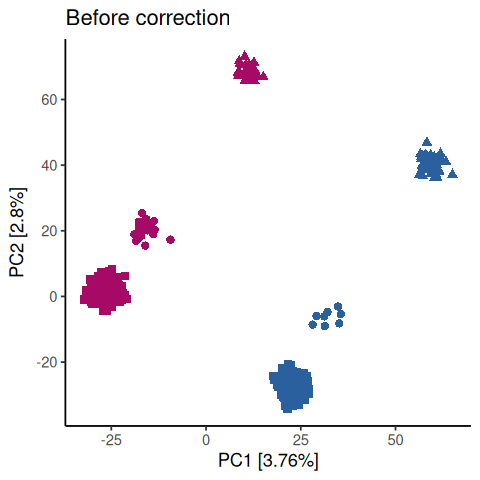

[1] "Run number 21"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.1343688 2.0843598 0.9702846 
    batch1     batch2     batch3 
10.5077149  0.2004083  0.6138838 
[1] "./strong_imbalanced/before/intermediate/21_intensities_data.tsv"
[1] "Run number 22"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
    batch1     batch2     batch3 
0.06511108 0.97556086 0.53759662 
   batch1    batch2    batch3 
0.1426847 0.6737267 1.3593297 
[1] "./strong_imbalanced/before/intermediate/22_intensities_data.tsv"
[1] "Run number 23"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.1013884 0.5267113 1.7208219 
    batch1     batch2     batch3 
0.78039780 6.45973366 0.07141346 
[1] "./strong_imbalanced/before/intermediate/23_intensities_data.tsv"
[1] "Run number 24"
162 
[1] "Number of DE proteins: 2400\n Number of proteins: 6000\n"
   batch1    batch2    batch3 
0.1852849 0.97486

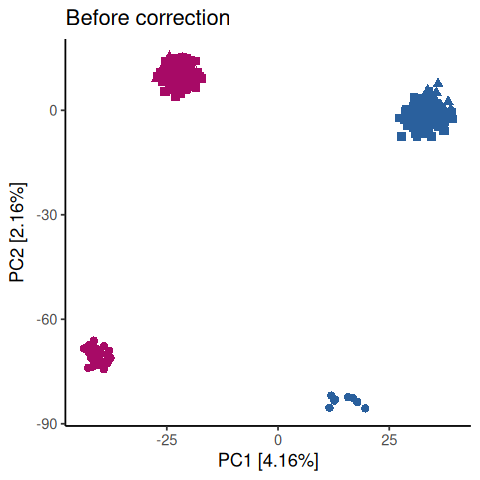

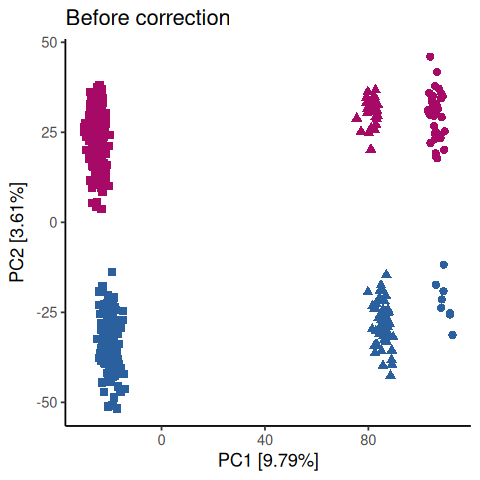

In [9]:
for (mode in c("balanced",
        "mild_imbalanced", 
        "strong_imbalanced"
    )){

    # select random seed
    set.seed(runif(1, 1, 10000))
    sub_path = mode

    # Set directories
    generated_data_directory <- paste0(workdir, sub_path, "/before/intermediate")
    print(generated_data_directory)
    check_dirs(generated_data_directory)

    # Create metadata
    batch_info <- data.frame(file = paste("s", 1:600, sep="."))
    rownames(batch_info) <- batch_info$file
    batch_info <- generate_metadata(batch_info, mode)
    # batch_info %>% group_by(batch, condition) %>%
    #     summarise(n = n()) %>% print()
    
    # Set parameters for simulation
    col_frac_A = length(batch_info[batch_info$condition == "A",]$file) / 600
    col_frac_B = length(batch_info[batch_info$condition == "B",]$file) / 600
    # cat(col_frac_A, "\n")
    # cat(col_frac_B)


    print(paste0("Run simulation for mode: ", mode))
    # Run simulation
    for(j in 1:number_of_runs){
        print(paste0("Run number ", j))
        set.seed(runif(1, 1, 10000))

        result <- generate_data(
            col_frac_A, col_frac_B,
            frac_1, frac_7,
            mu_1=mu_1, mu_4=mu_4,
            batch_info=batch_info,
            mode_version = mode,
            m = m
        ) %>% as.data.frame()
        
        number_DE <- frac_1*2500*2 + frac_7*1000

        rownames(result) <- c(paste0("prt", 1:length(rownames(result))))
        dim(result)
        print(paste0("Number of DE proteins: ", number_DE, "\n", " Number of proteins: ", nrow(result), "\n"))

        # second, add batch effects
        data_with_batch_effects <- add_batch_effect(result, batch_info)

        # Add missing values
        # data_with_batch_effects_missing <- simulateMissingValues(data_with_batch_effects, alpha = 0.2, beta = 0.5)
        # sum(is.na(data_with_batch_effects_missing)) / (nrow(data_with_batch_effects_missing) * ncol(data_with_batch_effects_missing))
        data_with_batch_effects_missing <- data_with_batch_effects

        print(paste0(generated_data_directory, "/", j, "_intensities_data.tsv"))
        # save data without missing values as one file
        data_with_batch_effects %>% rownames_to_column("rowname") %>%
            write.table(paste0(generated_data_directory, "/", j, "_intensities_data.tsv"), sep = "\t", row.names = FALSE)
        # and data with them as one file
        # write.table(data_with_batch_effects_missing, paste0(generated_data_directory, "/", j, "_intensities_data_missing.tsv"), sep = "\t")
        # and data without batch effects as one file
        result %>% rownames_to_column("rowname") %>%
            write.table(paste0(generated_data_directory, "/", j, "_intensities_data_no_batch.tsv"), sep = "\t", row.names = FALSE)

        if(j %% 10 == 0){
            print(paste0("Run number ", j))
            options(repr.plot.width=4, repr.plot.height=4)
            plot <- pca_plot(
                data_with_batch_effects_missing, batch_info,
                title = paste("Before correction"),
                quantitative_col_name = "file", 
                col_col = "condition", shape_col="batch", show_legend=F, cbPalette=c("#a70a66", "#2a609d"))
            print(plot)
        }

    }
    batch_info$lab <- mutate(batch_info, 
        lab =ifelse(batch == "batch1", "lab1", 
            ifelse(batch == "batch2", "lab2", "lab3")))$lab
    batch_info$batch <- NULL
    # write batch info
    write.table(batch_info, paste0(workdir, "/", mode, "/all_metadata.tsv"), sep = "\t")
}